## 합성곱 신경망

#### 합성곱
- 입력데이터에서 유용한 특성만 들어나게 하는 알고리즘
- 뉴런마다 입력 개수만큼의 가중치가 있음
    - 모든 입력에 가중치를 곱하게 됨 => 당연히 절편도 갖고 있으면 입력과 가중치를 곱하고 절편을 더하는 과정을 진행하게 됨
        - 편의상 절편은 생략해서 설명함
    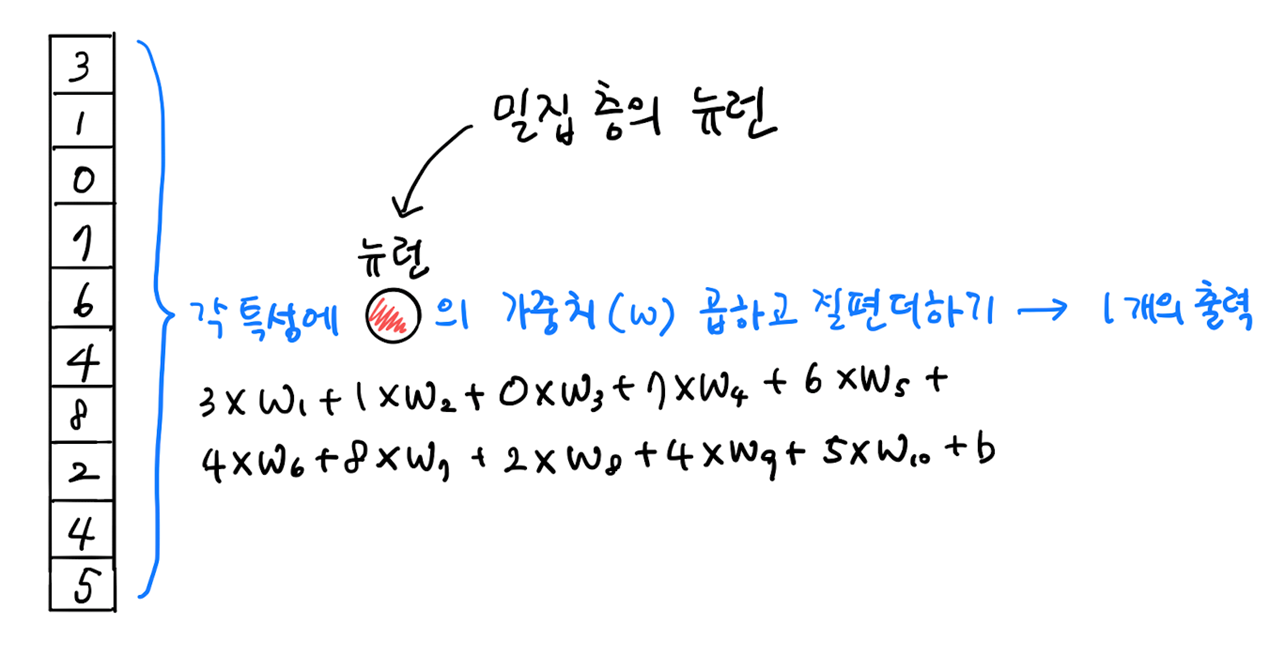
- 인공신경망은 처음에는 가중치와 절편을 랜덤하게 결정한 다음 에포크를 반복하게됨
    - 에포크를 반복하면서 경사하강법 알고리즘을 사용하여 손실이 낮아지도록 최적의 가중치와 절편을 찾아가게 됨(훈련)
    - 밀집층에 뉴런이 3개 있으면 출력도 3개가 됨(입력의 개수는 상관 없음)

### 합성곱
- 합성곱은 밀집층의 계산과 조금 다르다
    - 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에만 가중치를 적용하게 됨
    - 뉴런이 3개의 가중치를 가진다고 가정하면
    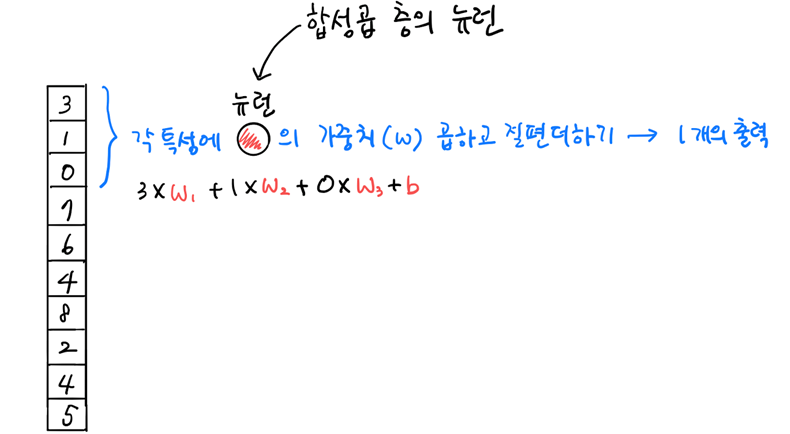
    - 가중치 w1~w3이 입력의 처음 3개의 특성과 곱해서 1개의 출력을 만듬
    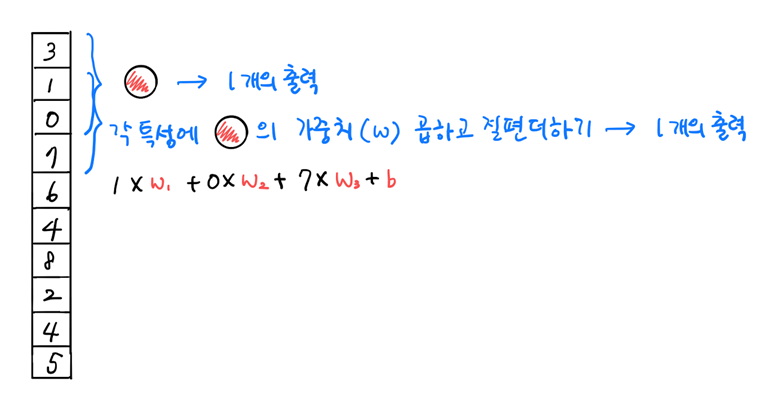
    - 뉴런이 한칸 아래로 이동해 두번째부터 네번째 특성과 곱해서 새로운 1개의 출력을 만듬
    - **첫번째 합성곱에서 사용된 가중치가 두번째 합성곱에도 똑같이 사용됨**
        - 한칸씩 아래로 이동하면서 출력을 만들게되고 뉴런의 가중치가 3이므로 8개의 출력이 만들어짐
    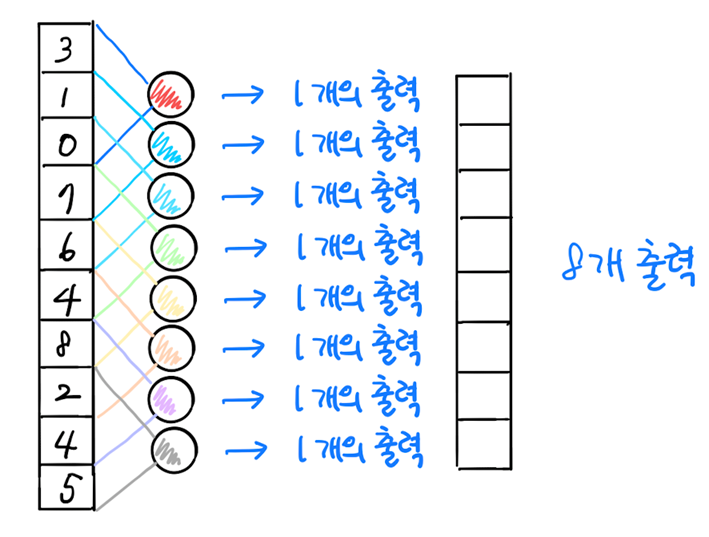
    - **이미지에는 색상이 다르게 나타났지만 한개의 뉴런이 8개의 출력을 만들어내는 것 임**

**신경망 밀집층 vs 합성곱**
- 밀집층 :  입력 개수만큼 10개의 가중치를 가지고 1개의 출력을 만든다.
- 합성곱층 : 3개(설정에 따라 다름-하이퍼파라미터)의 가중치를 가지고 8개의 출력을 만든다
    - 입력 데이터 위를 이동하면서 같은 도장을 하나씩 찍는것과 같고 도장을 하나씩 찍을 때 마다 출력이 하나씩 만들어짐
- **합성곱 신경망에서는 완전신경연결망과는 달리 뉴런이라는 용어보다는 필터 또는 커널 이라고 부름**
    - 즉, 뉴런 == 필터 == 커널

## 합성곱은 1차원 뿐만 아니라 2차원에도 적용할 수 있다

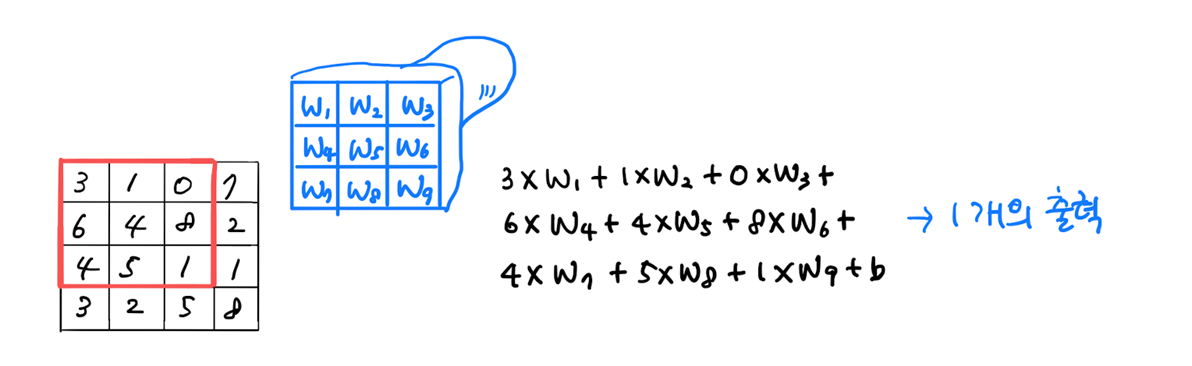
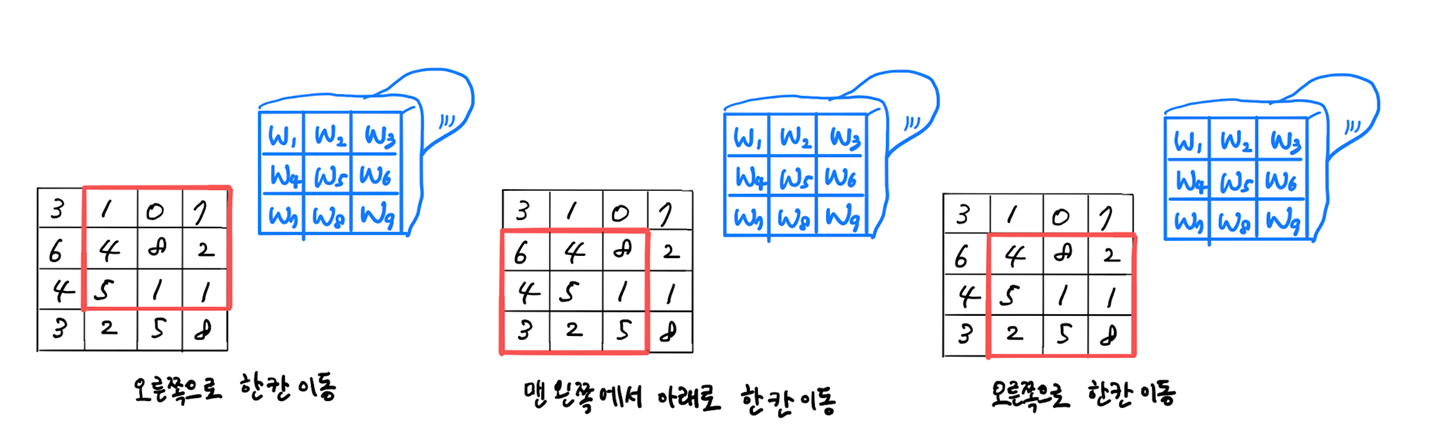
- 모두 4번 이동할수 있으므로 4개의 출력을 만든다. => 2 * 2 출력
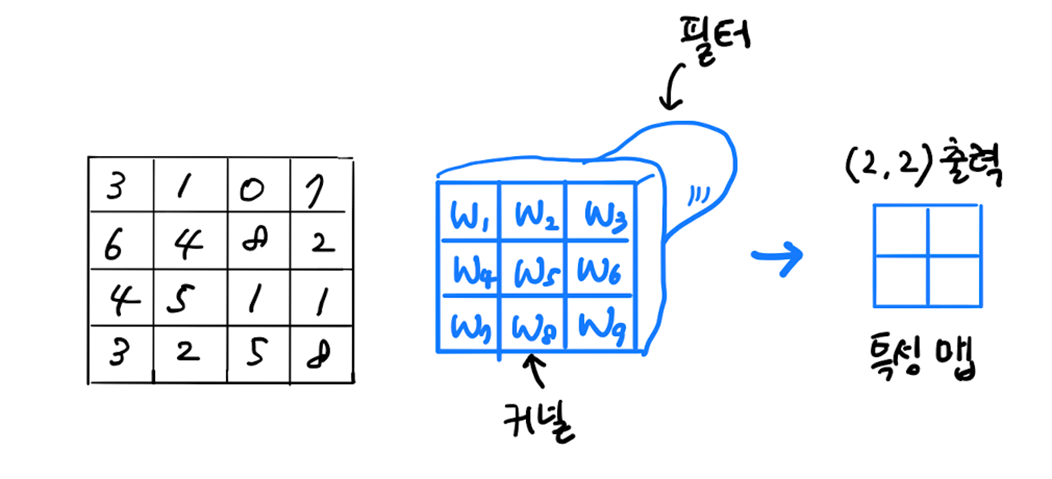

### 여러개의 필터(뉴런)을 사용할 수 있음
- 특성맵은 순서대로 차곡 차곡 쌓을 수 있으므로 2 * 2 특성맵을 쌓으면 3차원 배열이 됨
- 3개의 필터를 사용한 예 : 각 필터의 가중치는 다르게 사용한다(당연한 이야기 임)
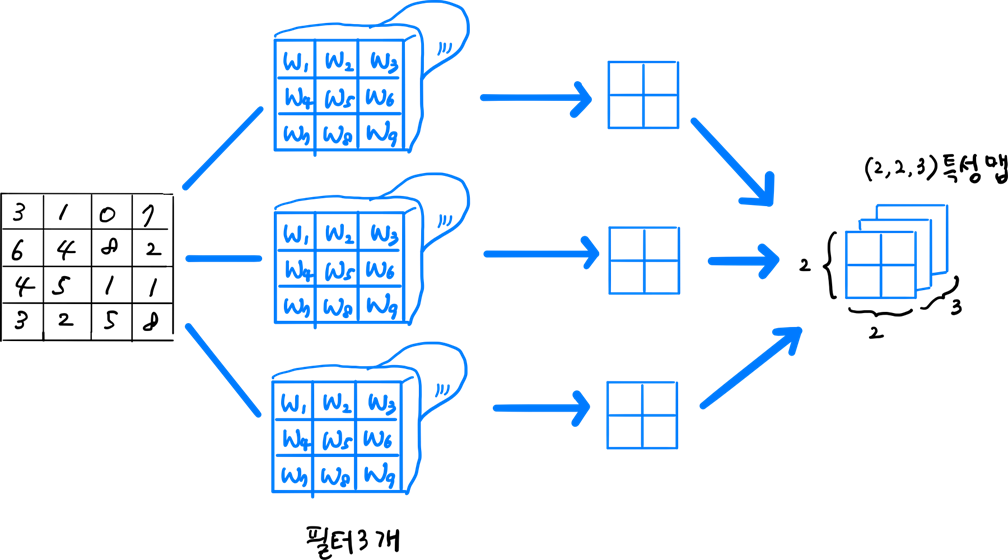

### 케라스 합성곱 층
- kearas.layers 패키지 아래 클래스로 구현되어 있음
- Conv2D 클래스로 제공
    - from tensorflow import keras
    - keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')
    - 첫번째 파라미터 : 필터(뉴런)수
    - 두번째 파라미터 : 커널(필터)의 크기
        - 필터수와 크기는 반드시 지정해야 함
    - 마지막 파라미터 : 활성화 함수
    - tip.특성맵은 활성화 함수를 통과한 후 임(편의상 이미지에 표현하지 않은 것 뿐) 
- 완전연결 신경망 Dense 층 대신 Conv2D층을 넣으면 합성곱 신경망이 됨
    - 합성곱신경망은 1개 이상 합성곱신경망층을 사용하면 합성곱모델이라고 함
    - 즉, 모든 층이 합성곱신경망일 필요는 없음

### 패딩과 스트라이드

- 앞의 예의 합성곱 계산는 4,4 크기의 입력에 3,3 크기의 커널을 적용하여 2,2 크기의 특성 맵을 만들었음
    - 커널 크기는 그대로 두고 출력의 크기를 입력과 동일하게 4,4로 만들려면????
        - 더 큰 입력에 합성곱을 해야 하지만, 입력의 크기는 정해져 있으므로
            - 임의로 크기를 확장해야 함(입력 배열 주위의 원소를 가상의 원소로 채움) => 패딩
            - 주위에 0으로 패딩하는 것을 same padding 이라고 함 - 값이 0으로 채워져 있기 때문에 계산에 영향을 미치지 않는다
                - 패딩 없이 순수한 입력 배열로 특성 맵을 만드는 것을 valid padding 이라고 함 => 특성맵의 크기가 줄어들 수 밖에 없음
            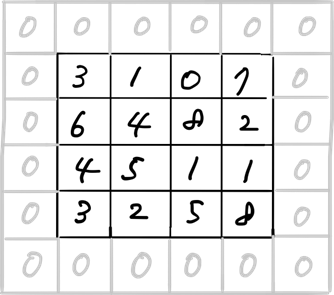
            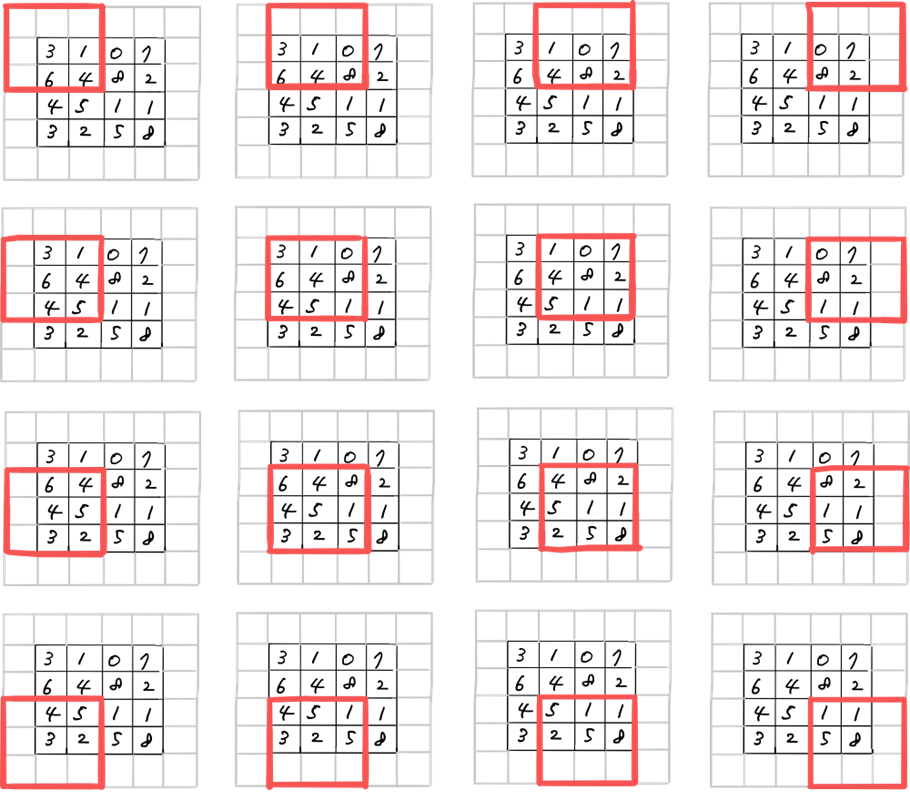
            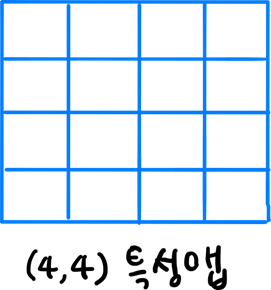

### 패딩을 사용하는 이유
   - 네 모서리의 값은 특성 계산에 한번만 사용하게 됨
    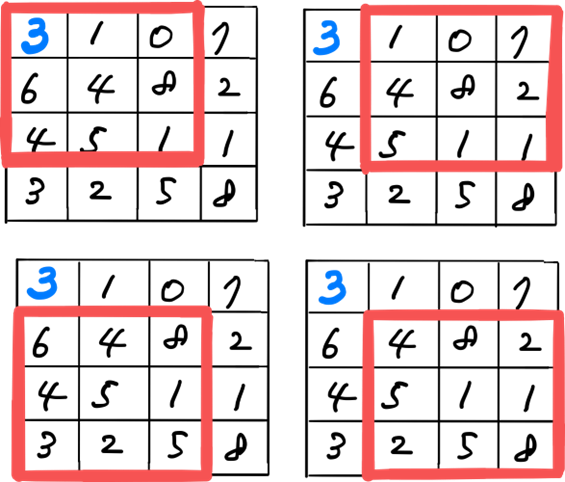
    
    
  -
   - 패딩을 하게 되면 네 모서리의 사용 횟수가 늘어남
    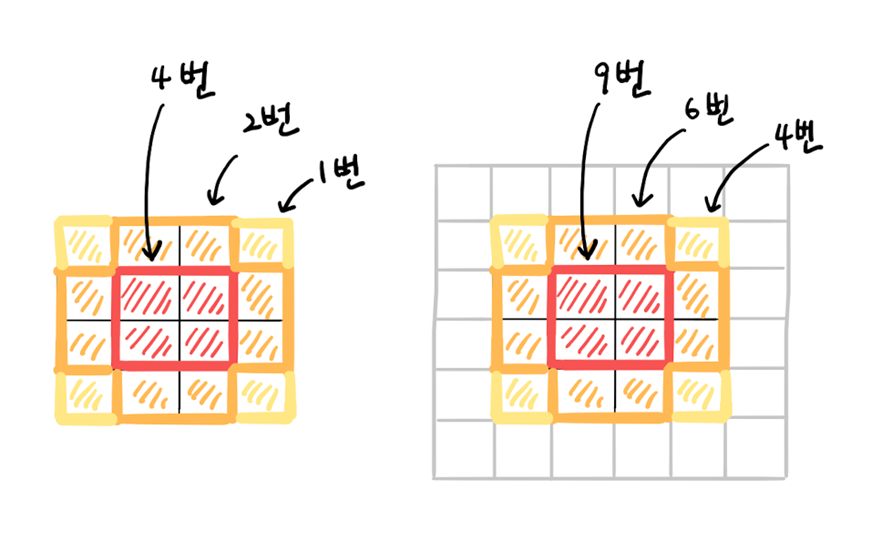

- 케라스의 패딩 설정
- keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu', padding='same')

### 스트라이드
- 합성곱 연산의 이동 크기
- 기본은 1이며 strides 매개변수를 사용하면 변경 할 수 있다. 
    - 즉, 한칸이 아닌 두칸 이상씩 이동할 수도 있음
    - **(가로, 세로) 튜플 형식으로 줄 수 있으나 가로 세로 다르게 이동하는 경우는 거의 없음**
        - 1을 초과하는 수치를 사용하는 경우도 거의 없다. **1칸씩 이동하는 것이 성능이 가장 좋음**
        - keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu’, padding='same’, strides=1)

### 풀링
- 합성곱층에서 만든 특성맵의 가로,세로 크기를 줄이는 역할
    - 합성곱층과 다른 층이 섞여 있을 수 있으므로 출력맵의 차원을 간단하게 정리해야 함
    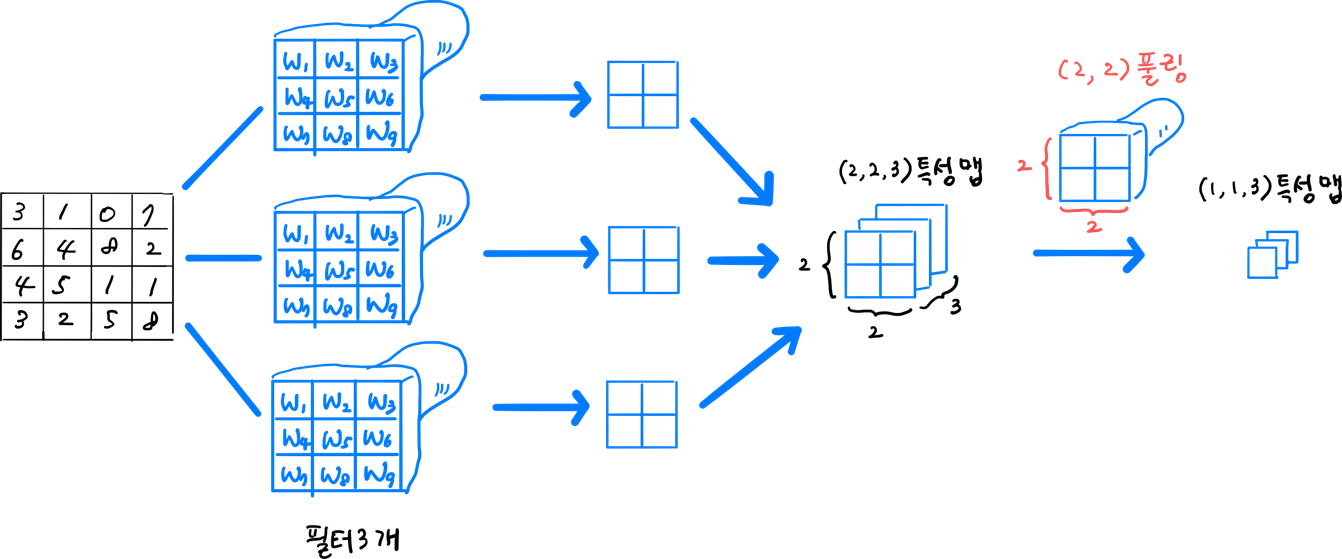

- 아래 그림 처럼 4,4 크기의 특성맵이 있다고 가정 했을 때
    - 2,2 풀링을 진행하면 절반으로 크기가 줄어든다
    - 풀링의 방법은 최대값을 선택하거나 평균을 구하는 방식을 사용
    - 풀링은 겹쳐지는 지점 없이 이동해서 특성맵을 단순화 시킨다
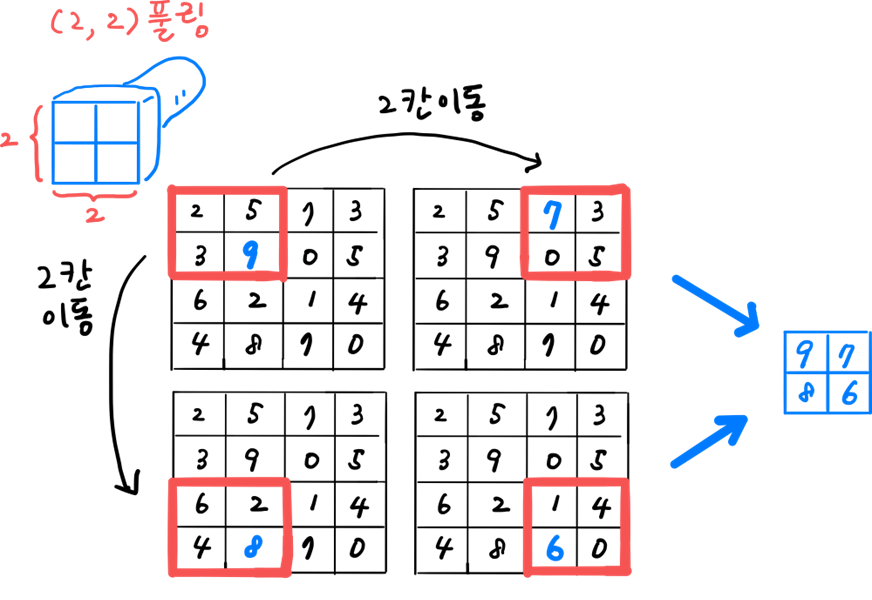

- keras.layers.MaxPooling2D(2)
- keras.layers.MaxPooling2D(2, strides=2, padding='valid')
- 평균풀링은 AveragePooling2D 클래스가 제공함

### 합성공 신경망 전체 구조
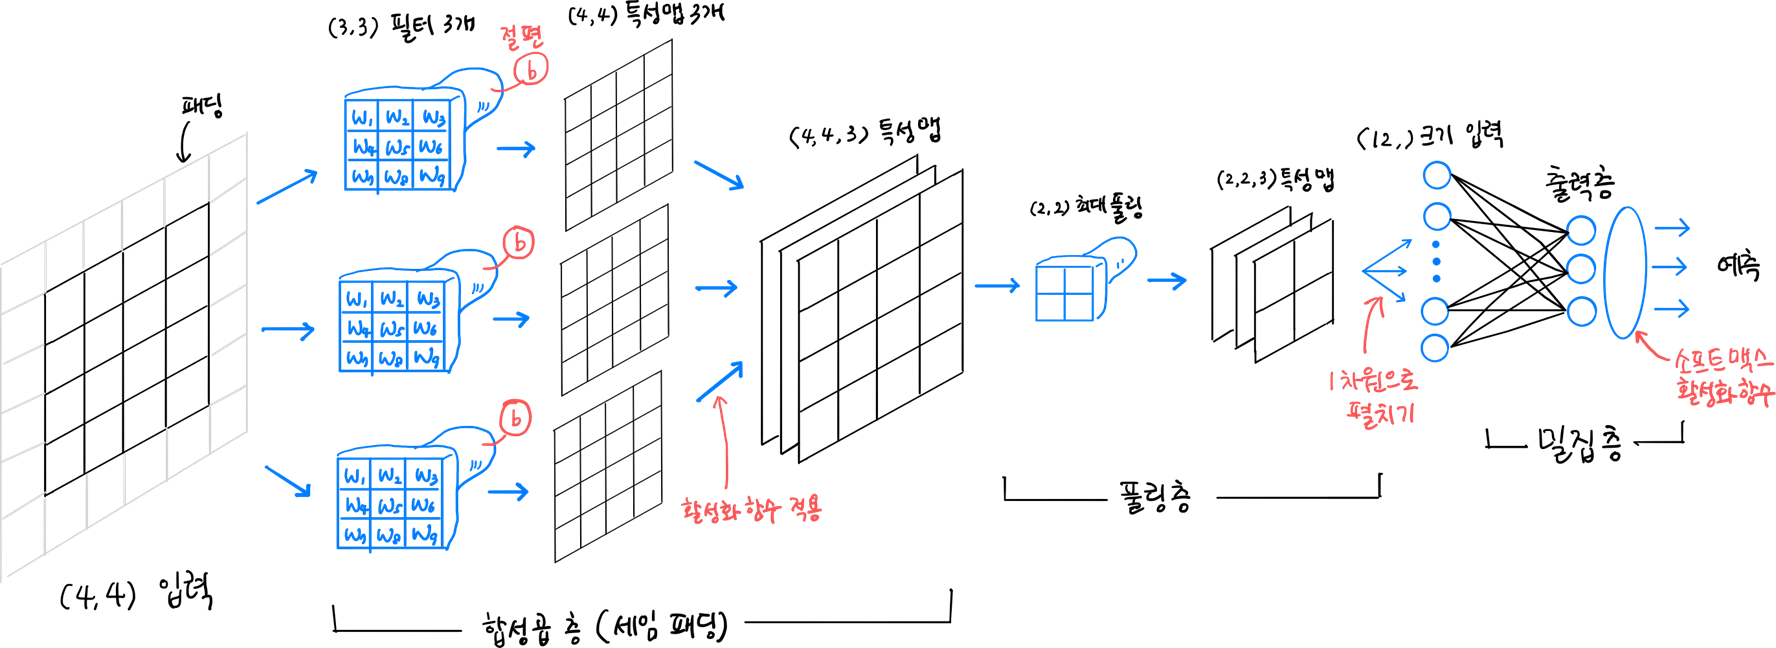

### 컬러이미지를 사용한 합성곱
- 흑백이미지인 경우에는 입력이 2차원 배열임
    - 컬러이미지는?????
        - RGB 채널로 구성되어 있기 때문에 3차원으로 표시 해야 함
        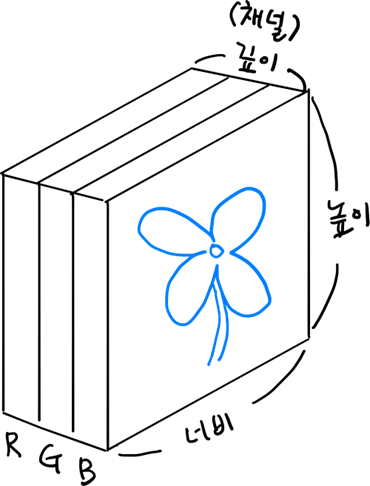

- 3차원 입력 3차원 커널 사용
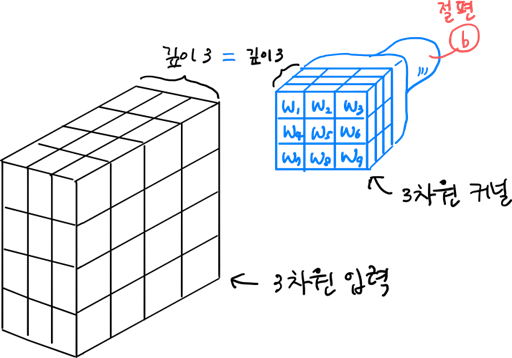
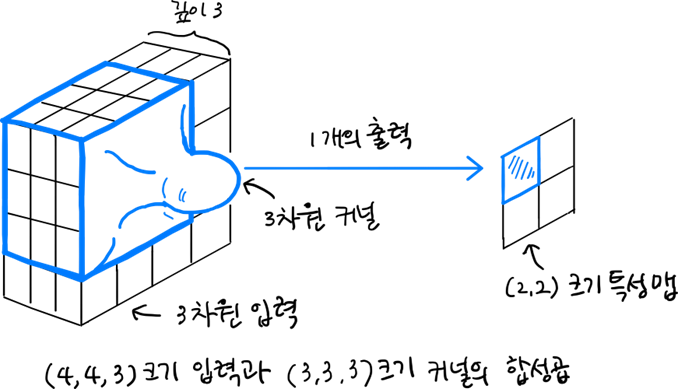

- 케라스는 기본적으로 3차원 입력을 요구함
    - 앞의 2차원 배열을 사용한 것은 (28,28,1)로 처리 된 것임
 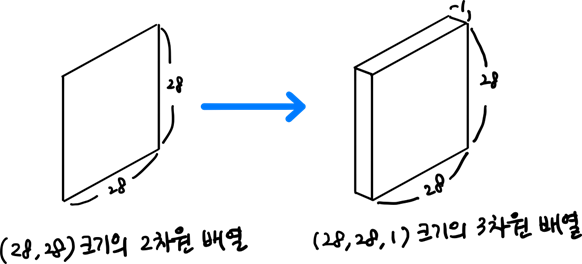

- 칼라이미지는 3차원의 깊이만 제대로 명시해 주면 됨
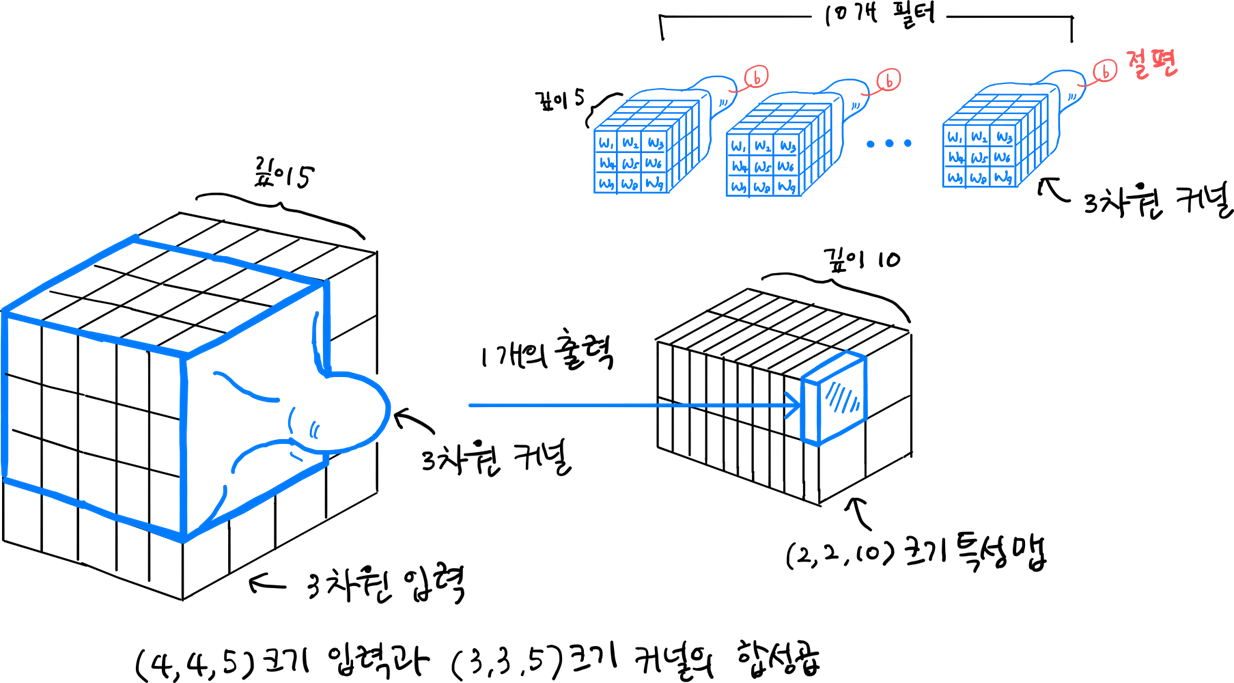